In [63]:
import os
os.environ['AEON_DEPRECATION_WARNING'] = 'False'

import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

In [81]:
path = "TLB_logs/"
files = [
    #"pp_all_ucr_16_2-18-11-24.csv",
    "pp_all_ucr_16_4-18-11-24.csv",
    "pp_all_ucr_16_8-18-11-24.csv",
    "pp_all_ucr_16_16-18-11-24.csv",
    "pp_all_ucr_16_32-18-11-24.csv",
    "pp_all_ucr_16_64-18-11-24.csv",
    "pp_all_ucr_16_128-18-11-24.csv",
    "pp_all_ucr_16_256-18-11-24.csv"
]

configs = [4, 8, 16, 32, 64, 128, 256]  # 2, 
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA Equi-Depth", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA Equi-Depth +Variance", # + str(configs[i]),
               "sfa_equi-width_False": "SFA Equi-Width", # + str(configs[i]),
               "sfa_equi-width_True": "SFA Equi-Width +Variance", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    # df["Pruning_Power"] = df["Pruning_Power"][0][1:-1]
    df_all = pd.concat([df_all, df])        

df = df_all
# df.rename(columns={"Pruning_Power":"Pruning Power"}, inplace=True)
df = df.infer_objects()
display(df)

,Method,Dataset,Pruning_Power,Config
0,iSAX,ArrowHead,0.400476,4
1,SFA Equi-Width +Variance,ArrowHead,0.670000,4
2,SFA Equi-Width,ArrowHead,0.663175,4
3,SFA Equi-Depth +Variance,ArrowHead,0.756190,4
4,SFA Equi-Depth,ArrowHead,0.740635,4
...,...,...,...,...
590,iSAX,Yoga,0.990622,256
591,SFA Equi-Width +Variance,Yoga,0.993584,256
592,SFA Equi-Width,Yoga,0.993584,256
593,SFA Equi-Depth +Variance,Yoga,0.993740,256


In [82]:
df = df.sort_values(by=["Dataset", "Config"])

df_normed = df.groupby(["Dataset", "Config"]) \
            .apply(lambda l: l["Pruning_Power"] / ((l["Pruning_Power"].iloc[0]))).reset_index()
    
#df_factor = df.groupby(["Dataset", "Config"]) \
#            .apply(lambda l: (l["Pruning_Power"].iloc[0]) / l["Pruning_Power"]).reset_index()

df2 = df.copy().reset_index(drop=True)
df2["factor"] = df_normed["Pruning_Power"]

df_sub = df2.reset_index()[(df2.Method == "SFA Equi-Width +Variance") & (df2.Config==2)].sort_values("factor",ascending=False)
display(df_sub)
# sns.lineplot(x="Dataset", y="factor", hue="Method", data=df_sub, sort=True)

,index,Method,Dataset,Pruning_Power,Config,factor


In [83]:
# df2[(df2.Method == "iSAX") & (df2.Config==2)].sort_values("factor")

In [84]:
#df[["Method", "Pruning_Power", "Config"]] \
#        .groupby(["Method", "Config"]).median() \
#        .sort_values(by=["Config", "Method"], ascending=True)

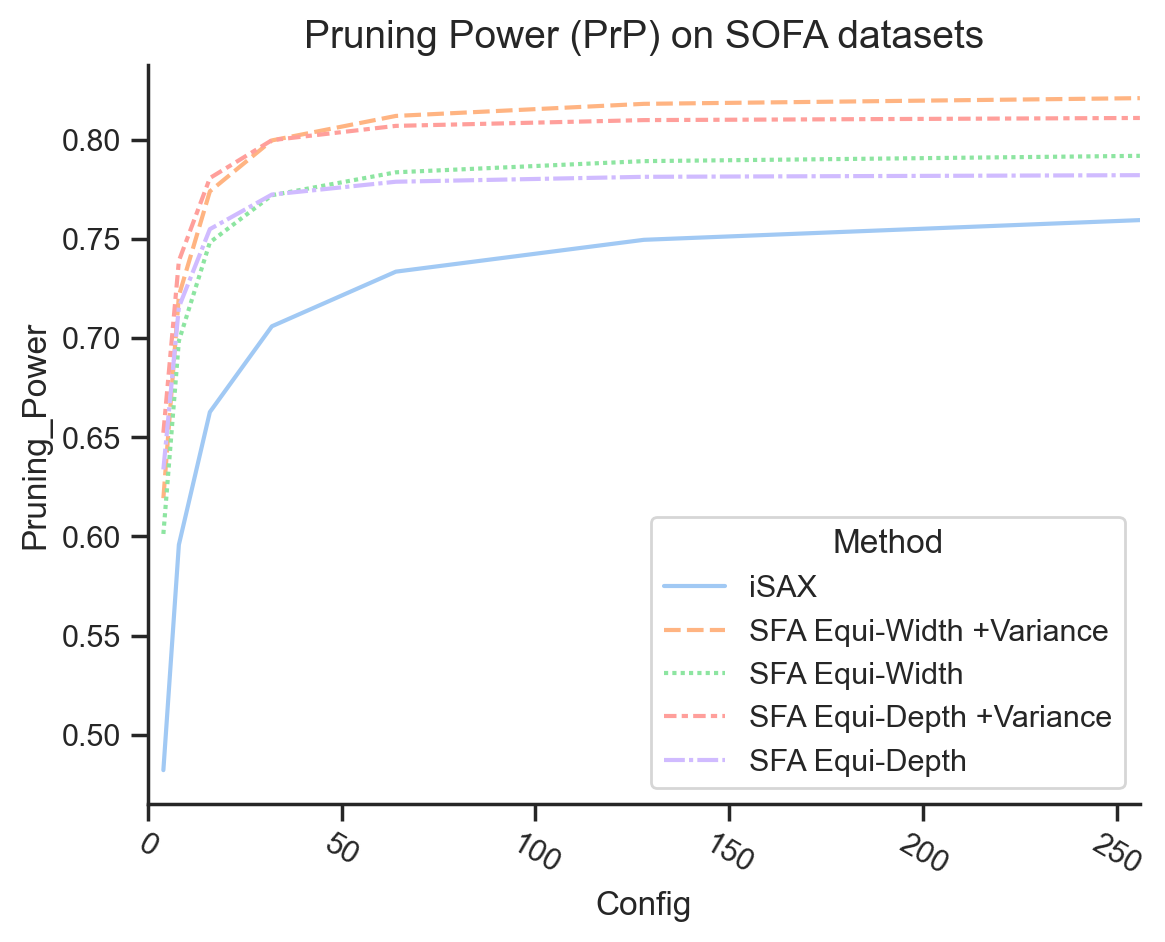

In [85]:
df["To Search"] = 1-df["Pruning_Power"]
sns.set_theme(style="ticks", palette="pastel")

ax = sns.lineplot(
    x="Config", y="Pruning_Power", hue="Method", style="Method", data=df, err_style="bars", errorbar=("se", 0)    
)
ax.set_title("Pruning Power (PrP) on SOFA datasets", fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_xlim([0,256])
sns.despine()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()
# plt.tight_layout()
plt.savefig("images/pp_sofa_boxplot.pdf", bbox_inches='tight')

In [86]:
#df[["Config", "Method", "TLB"]] \
#        .groupby(["Config", "Method"]).median() \
#        .sort_values(by=["Config", "TLB"], ascending=False).reset_index()[["Config", "Method"]]

In [87]:
df_sub = df#[df.Method.isin(["SFA Equi-Width +Variance", "SFA Equi-Width", "iSAX"])]
result = df_sub[["Config", "Method", "Pruning_Power"]] \
        .groupby(["Config", "Method"]).mean() \
        .pivot_table(columns="Config", index="Method")

result

Pruning_Power                                \
Config                             4         8         16        32    
Method                                                                 
SFA Equi-Depth                0.633776  0.715642  0.754970  0.772412   
SFA Equi-Depth +Variance      0.652257  0.738989  0.780736  0.799843   
SFA Equi-Width                0.601243  0.698610  0.748293  0.772063   
SFA Equi-Width +Variance      0.619275  0.721410  0.774036  0.799714   
iSAX                          0.482124  0.595818  0.662720  0.705974   

                                                        
Config                         64        128       256  
Method                                                  
SFA Equi-Depth            0.778879  0.781360  0.782189  
SFA Equi-Depth +Variance  0.807048  0.809961  0.811035  
SFA Equi-Width            0.783637  0.789267  0.791939  
SFA Equi-Width +Variance  0.812064  0.818160  0.821031  
iSAX                      0.733533  0.749586  0.759527

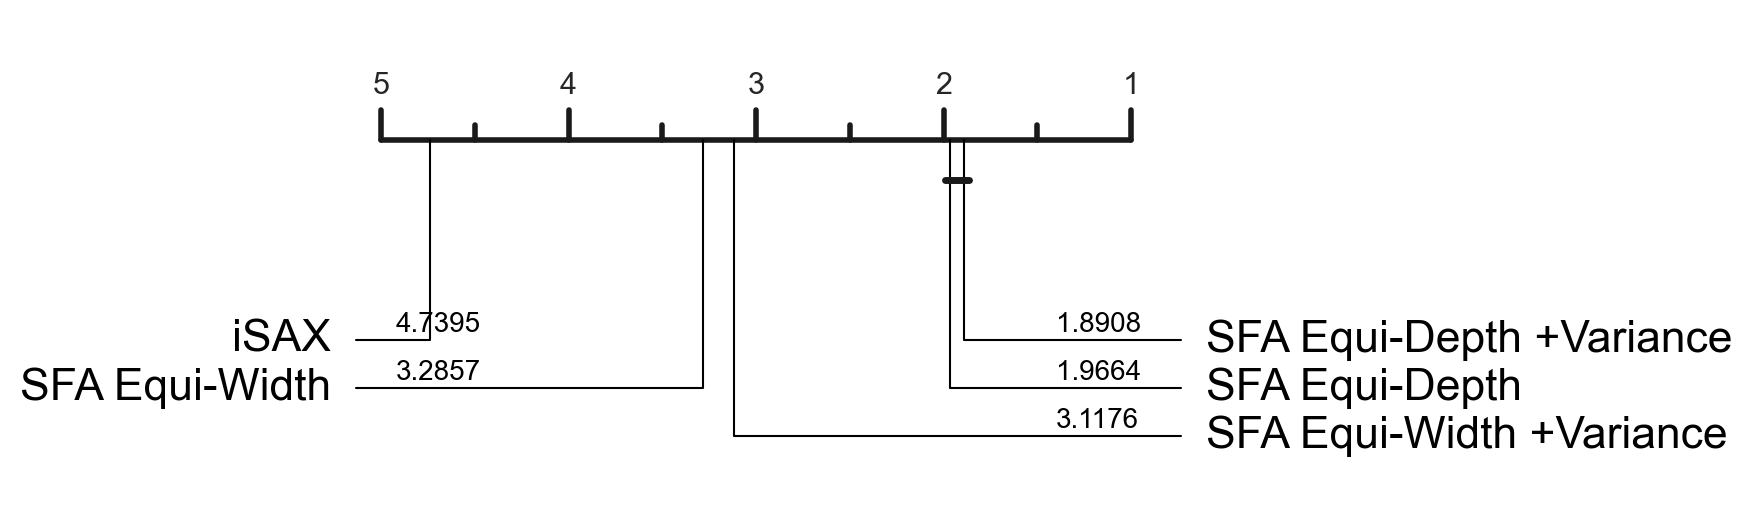

In [89]:
df_pivot = df[df.Config==4].pivot(index='Dataset', columns='Method', values='Pruning_Power')
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
#plt.tight_layout()
plt.savefig("images/pp_UCR_cd_diagramm.pdf", bbox_inches='tight')